# **Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("/content/Student_Performance.csv")

# **EDA**

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.shape

(9873, 6)

# **Preprocessing**

In [ ]:
dtypes = df.dtypes
n_uniq = df.nunique()
dtypes

,0
Hours Studied,int64
Previous Scores,int64
Extracurricular Activities,object
Sleep Hours,int64
Sample Question Papers Practiced,int64
Performance Index,float64


In [ ]:
n_uniq

,0
Hours Studied,9
Previous Scores,60
Extracurricular Activities,2
Sleep Hours,6
Sample Question Papers Practiced,10
Performance Index,91


In [ ]:
cols = ["Extracurricular Activities"]
df[cols] = df[cols].astype('category')
pd.DataFrame(df.dtypes).T

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,int64,int64,category,int64,int64,float64


In [ ]:
null = df.isnull().sum()
ratio = null / df.shape[0]
pd.DataFrame({"Null_sum": null, "Ratio": ratio}).T

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'No': 0, 'Yes': 1})
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [ ]:
df.duplicated().sum()

np.int64(127)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

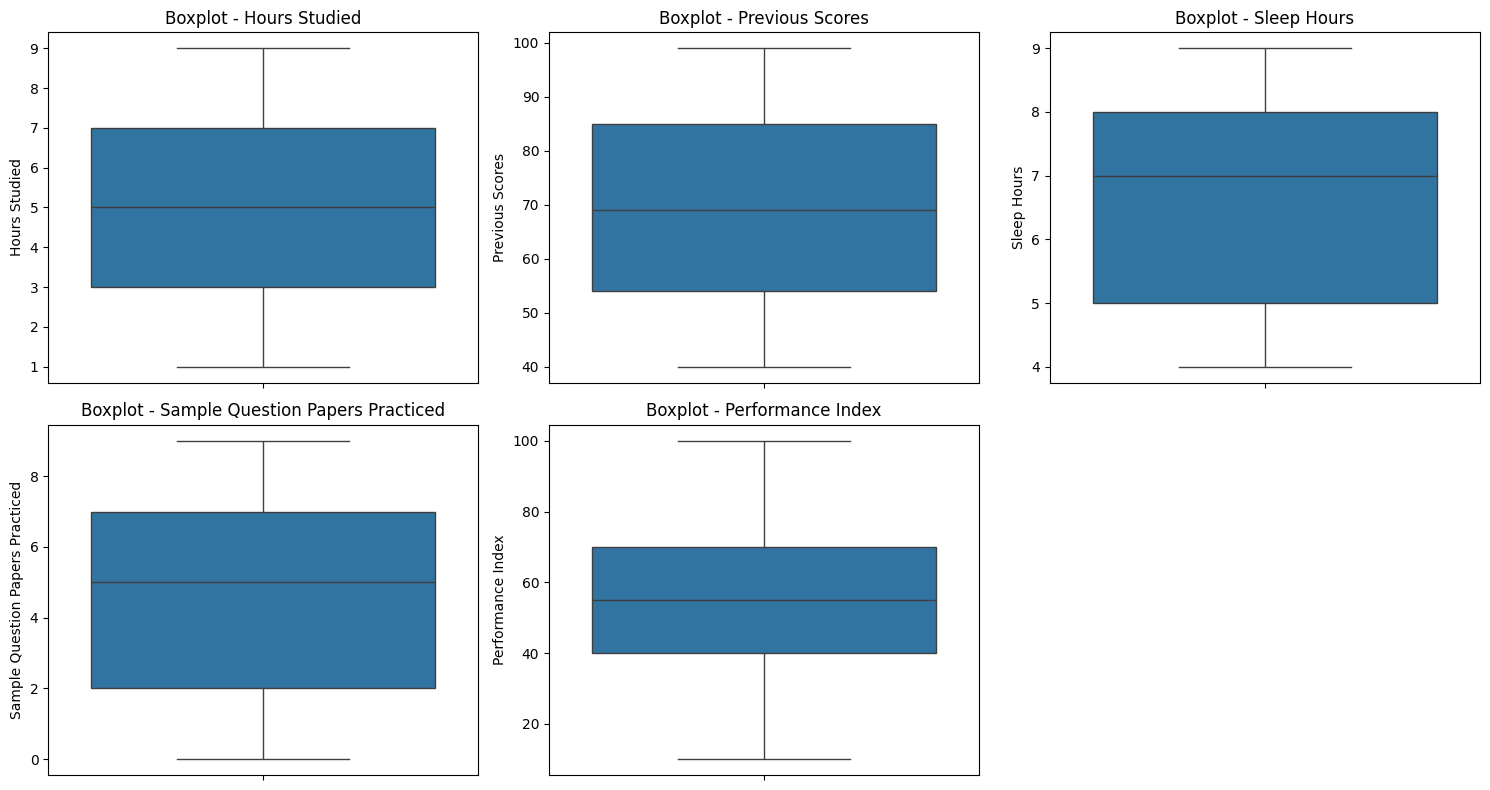

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()


In [ ]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))

outliers_sum = outliers.sum()
print("Outliers per column:")
print(outliers_sum)

Outliers per column:
Hours Studied                       0
Previous Scores                     0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


# **Visualization**

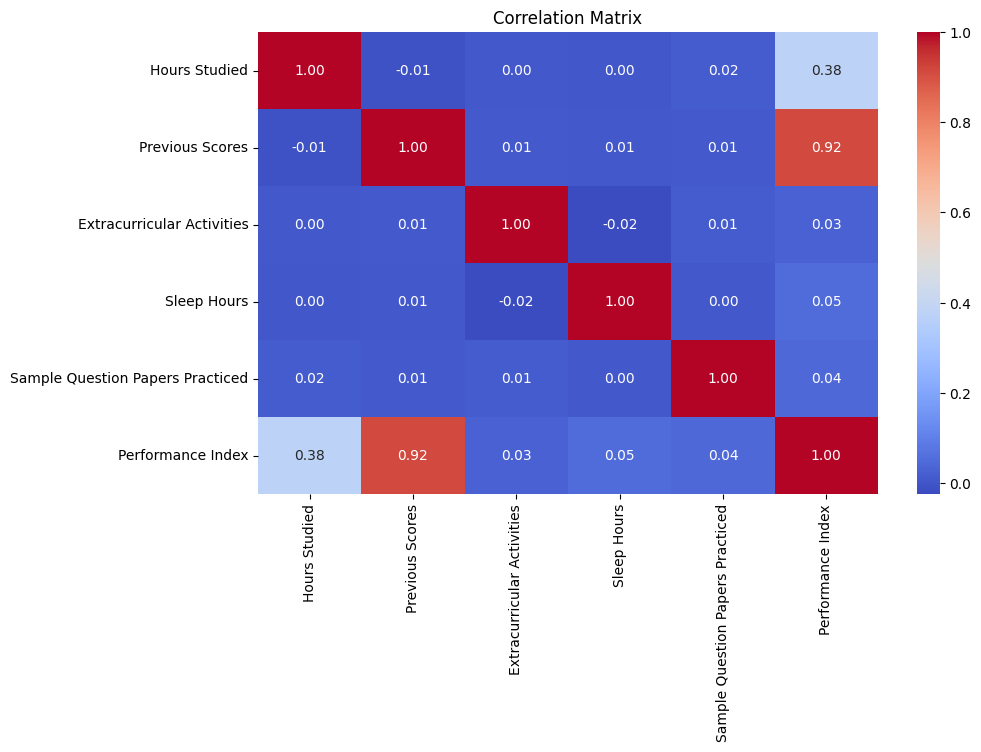

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

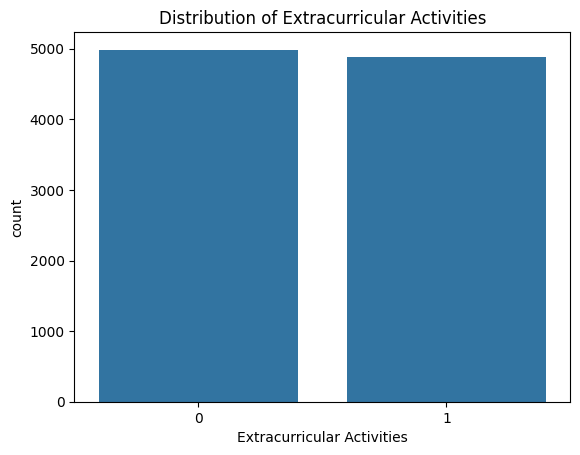

In [ ]:
#Count Plot
sns.countplot(x='Extracurricular Activities', data=df)
plt.title("Distribution of Extracurricular Activities")
plt.show()

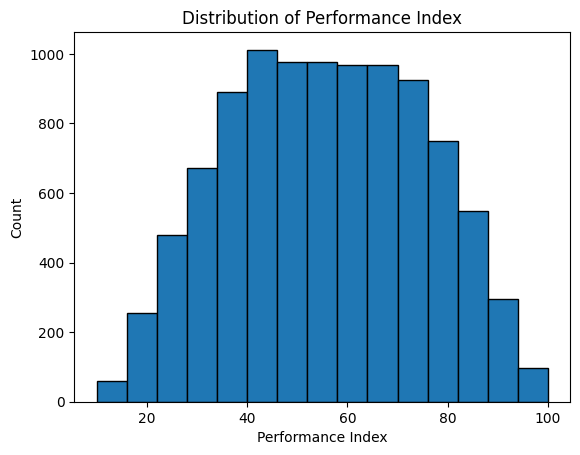

In [ ]:
#histogram
df['Performance Index'].hist(bins=15, edgecolor='black')
plt.title("Distribution of Performance Index")
plt.xlabel("Performance Index")
plt.ylabel("Count")
plt.grid(False)
plt.show()


# **Data Splitting**

In [ ]:
X = df.drop(['Performance Index'], axis=1)
y = df['Performance Index']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Training**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Evaluating the Model**

In [ ]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 4.082628398521853
R^2 Score: 0.9889832909573145


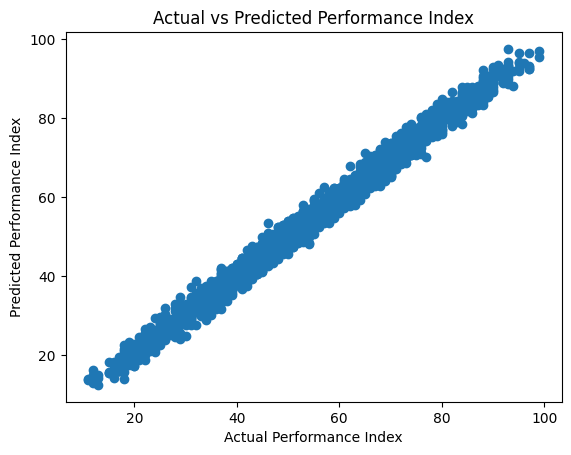

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted Performance Index")
plt.show()